In [4]:
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt
import glob
import networkx as nx

In [5]:
# reading all csv files
csv_files = glob.glob("*.csv")
dict_of_data = {file_name:pd.read_csv(file_name) for file_name in csv_files}

In [6]:
labels_IF1 = dict_of_data["7120_IF1.csv"].columns
labels_IF1

Index(['Unnamed: 0', 'cell.ID', 'nucleus.x', 'nucleus.y',
       'CD15.score.normalized', 'CK.score.normalized', 'CD3.score.normalized',
       'CD11c.score.normalized', 'CD20.score.normalized',
       'CD163.score.normalized', 'tissue.type', 'in.ROI.adipose_tissue',
       'in.ROI.necrosis', 'in.ROI.tls', 'in.ROI.tumor_tissue'],
      dtype='object')

In [7]:
labels_IF2 = dict_of_data["7120_IF2.csv"].columns
labels_IF2

Index(['Unnamed: 0', 'cell.ID', 'nucleus.x', 'nucleus.y',
       'PD1.score.normalized', 'CK.score.normalized', 'Ki67.score.normalized',
       'GB.score.normalized', 'CD8.score.normalized', 'PDL1.score.normalized',
       'tissue.type', 'in.ROI.adipose_tissue', 'in.ROI.necrosis',
       'in.ROI.tumor_tissue'],
      dtype='object')

In [8]:
labels_IF3 = dict_of_data["7120_IF3.csv"].columns
labels_IF3

Index(['Unnamed: 0', 'cell.ID', 'nucleus.x', 'nucleus.y',
       'CD4.score.normalized', 'CK.score.normalized', 'CD3.score.normalized',
       'CD56.score.normalized', 'CD8.score.normalized',
       'FOXP3.score.normalized', 'tissue.type', 'in.ROI.adipose_tissue',
       'in.ROI.necrosis', 'in.ROI.next_to_tumor_tissue',
       'in.ROI.tumor_tissue'],
      dtype='object')

In [9]:
'''
IF1 : CK, CD11c, CD20, CD163, CD3, CD15
IF2, IF3: ... [patrz labels]
ROI = region of intrest
te panele leżą tuż nad sobą, są wynikiem cięcia tkanek uzyskanych w biopsji
IF - immunoflorescence
CK - skierowane w wykrywanie tumor cell
CD20 - BCell - kom. układu odpornościowego
TLS - zestawy komórek immunologicznych obok siebie (zbijają się w kulkę)
szukamy związków komórki rakowe a immunologiczne
'''

'\nIF1 : CK, CD11c, CD20, CD163, CD3, CD15\nIF2, IF3: ... [patrz labels]\nROI = region of intrest\nte panele leżą tuż nad sobą, są wynikiem cięcia tkanek uzyskanych w biopsji\nIF - immunoflorescence\nCK - skierowane w wykrywanie tumor cell\nCD20 - BCell - kom. układu odpornościowego\nTLS - zestawy komórek immunologicznych obok siebie (zbijają się w kulkę)\nszukamy związków komórki rakowe a immunologiczne\n'

In [19]:
# IF_name to IF1, IF2 lub IF3
def analises_IFn(IF_name):
    for file_name, df in dict_of_data.items():
        if file_name.find(IF_name) != -1:
            pass

In [10]:
def visualisation_IFn(df):
    fig, ax = plt.subplots(2)
    t = df.loc[df['tissue.type']=='tumor']
    n = df.loc[df['tissue.type']!='tumor']
    # plt.scatter(t["nucleus.x"], t["nucleus.y"], color='red',label='tumor')
    ax[0].scatter(df["nucleus.x"], df["nucleus.y"],c=df["CK.score.normalized"],cmap="Greens",s=2)
    ax[1].scatter(n["nucleus.x"], n["nucleus.y"], color='blue',label='not tumor',s=1, alpha=0.8)
    ax[1].scatter(t["nucleus.x"], t["nucleus.y"], color='red',label='tumor',s=1, alpha=0.8)
    ax[1].legend()
    fig.show()


/tmp/ipykernel_70443/1119607660.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


'visualisation_IFn(dict_of_data["7120_IF2.csv"])\nvisualisation_IFn(dict_of_data["7120_IF3.csv"])'

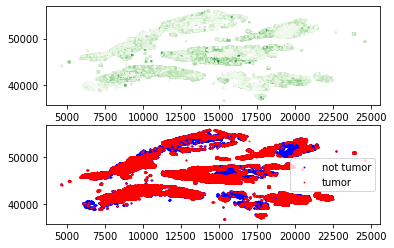

In [81]:
visualisation_IFn(dict_of_data["7120_IF1.csv"])
'''visualisation_IFn(dict_of_data["7120_IF2.csv"])
visualisation_IFn(dict_of_data["7120_IF3.csv"])'''

In [12]:
def score_analisys(df):
    new_labels=[]
    for col in df.columns:
        if col.find("normalized")!=-1:
            new_col_name = col[:col.find(".")]
            df[new_col_name] = df[col] > 1
            new_labels.append(new_col_name)
    for label in new_labels:
        for label2 in new_labels:
            if label != label2:
                df[f"{label}x{label2}"] = df[label]*df[label2]
    

In [13]:
score_analisys(dict_of_data["7120_IF1.csv"])
df = dict_of_data["7120_IF1.csv"]

In [14]:
def analises_of_actives(df):
    df["number_of_active"]=0
    cell_type = {'CK':'tumor','CD20':'BCell', 'CD162':'Macrophage','CKxCD20': 'BnTCell'}
    df["Cell_type"] = "other"
    for col in df.columns:
        if col.find("normalized")!=-1:
            new_col_name = col[:col.find(".")]
            df.loc[df[new_col_name]==True,"number_of_active"] += 1
            if new_col_name in cell_type.keys():
                df.loc[df[new_col_name]==True,"Cell_type"] = cell_type[new_col_name]
    scatter = plt.scatter(df["nucleus.x"],df["nucleus.y"],c=df["number_of_active"],s=1)
    legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="Number of actives")
     

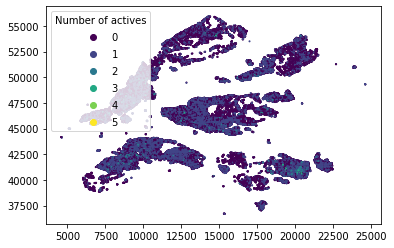

In [15]:
analises_of_actives(df)


In [35]:
def plotting_cell_type(df):
    tumor = df.loc[df["Cell_type"]=='tumor']
    BCell=df.loc[df["Cell_type"]=='BCell']
    BnTCell = df.loc[df["Cell_type"]=='BnTCell']
    Mac = df.loc[df["Cell_type"]=='Macrophage']
    other=df.loc[df["Cell_type"]=='other']
    plt.scatter(other["nucleus.x"],other["nucleus.y"],color ='purple',s=1,label='other')
    plt.scatter(tumor["nucleus.x"],tumor["nucleus.y"],color ='yellow',s=1,label='tumor')
    plt.scatter(BCell["nucleus.x"],BCell["nucleus.y"],color ='blue',s=1,label='BCell')
    plt.scatter(Mac["nucleus.x"],Mac["nucleus.y"],color ='green',s=1,label='Macrophage')
    plt.scatter(BnTCell["nucleus.x"],BnTCell["nucleus.y"],color ='black',s=1,label='BnTCell')
    plt.legend(loc="upper left",title='Cell type',markerscale=5)

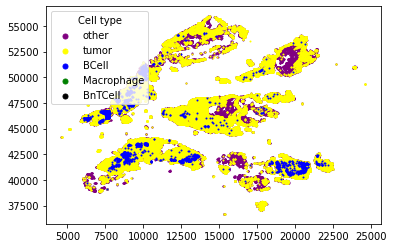

In [36]:
plotting_cell_type(df)

In [ ]:
#TLS: Bcell, Tcell, Max

In [16]:
# making graph
from sklearn.neighbors import radius_neighbors_graph
from scipy.sparse import csgraph
def making_graph(df):
    points_list = list(zip(df["nucleus.x"],df["nucleus.y"]))
    graph_dict = radius_neighbors_graph(points_list, 100, mode='distance',include_self=True)
    return graph_dict, points_list
    

In [28]:
def making_graph_with_unusual_cell(df):
    new_df = df.loc[df["Cell_type"]!='other']
    graph, points = making_graph(new_df)
    print(f"graph shape = {graph.shape}")
    connected_components = csgraph.connected_components(graph)
    print(f"number of components = {connected_components[0]}")
    #TODO return which component for every cell
    new_df["TLS"] = [x for x in connected_components[1]]
    return new_df

In [29]:
new_df = making_graph_with_unusual_cell(df)

graph shape = (130075, 130075)
number of components = 314


/tmp/ipykernel_84743/1331682107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["TLS"] = [x for x in connected_components[1]]


In [30]:
new_df

,Unnamed: 0,cell.ID,nucleus.x,nucleus.y,CD15.score.normalized,CK.score.normalized,CD3.score.normalized,CD11c.score.normalized,CD20.score.normalized,CD163.score.normalized,...,CD20xCD11c,CD20xCD163,CD163xCD15,CD163xCK,CD163xCD3,CD163xCD11c,CD163xCD20,number_of_active,Cell_type,TLS
0,0,4,4625.37,44152.91,0.00,1.10,0.11,0.15,0.00,0.15,...,False,False,False,False,False,False,False,1,tumor,0
1,1,5,4603.87,44150.06,0.30,2.67,0.07,0.25,0.00,0.06,...,False,False,False,False,False,False,False,1,tumor,0
2,2,6,4624.16,44134.67,0.43,2.18,0.00,0.06,0.00,0.11,...,False,False,False,False,False,False,False,1,tumor,0
3,3,7,4643.68,44139.07,0.00,1.09,0.00,0.25,0.20,0.00,...,False,False,False,False,False,False,False,1,tumor,0
6,6,10,4634.77,44129.99,0.29,1.95,0.25,0.33,0.18,0.11,...,False,False,False,False,False,False,False,1,tumor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233569,233569,297461,9274.52,49907.72,0.00,2.68,0.89,0.48,0.23,0.11,...,False,False,False,False,False,False,False,1,tumor,2
233572,233572,297464,9412.67,49828.43,0.03,1.96,0.20,0.11,0.00,0.00,...,False,False,False,False,False,False,False,1,tumor,2
233574,233574,297466,9239.20,50049.78,0.00,1.88,0.17,0.25,0.25,0.01,...,False,False,False,False,False,False,False,1,tumor,2
233575,233575,297467,9361.31,49914.18,0.00,0.33,0.21,0.21,2.48,0.03,...,False,False,False,False,False,False,False,1,BCell,2


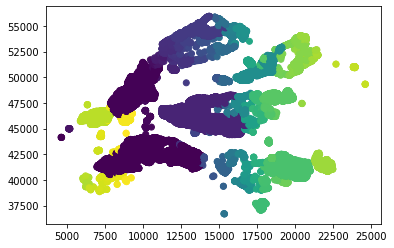

In [34]:
plt.scatter(new_df["nucleus.x"],new_df["nucleus.y"], c=new_df["TLS"])

(array([79599., 48470., 53059., 33556., 12481.,  4304.,  1395.,   484.,
          139.,    94.]),
 array([0.01 , 0.672, 1.334, 1.996, 2.658, 3.32 , 3.982, 4.644, 5.306,
        5.968, 6.63 ]),
 <BarContainer object of 10 artists>)

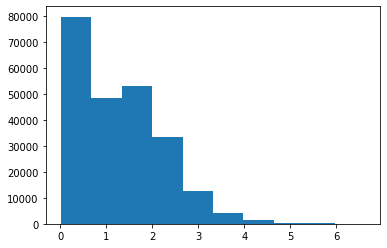

In [20]:
plt.hist(dict_of_data["7120_IF1.csv"]["CK.score.normalized"])

(array([2.09099e+05, 2.17440e+04, 1.89000e+03, 4.81000e+02, 1.84000e+02,
        8.70000e+01, 3.70000e+01, 2.00000e+01, 1.60000e+01, 2.30000e+01]),
 array([0.   , 0.378, 0.756, 1.134, 1.512, 1.89 , 2.268, 2.646, 3.024,
        3.402, 3.78 ]),
 <BarContainer object of 10 artists>)

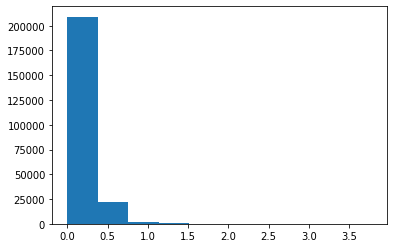

In [21]:
plt.hist(dict_of_data["7120_IF1.csv"]["CD11c.score.normalized"])

(array([1.15017e+05, 7.48150e+04, 6.02020e+04, 2.31950e+04, 4.88400e+03,
        9.64000e+02, 2.59000e+02, 1.06000e+02, 7.10000e+01, 1.50000e+01]),
 array([ 0.  ,  1.04,  2.08,  3.12,  4.16,  5.2 ,  6.24,  7.28,  8.32,
         9.36, 10.4 ]),
 <BarContainer object of 10 artists>)

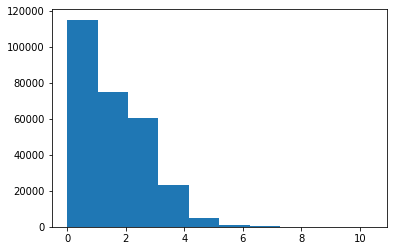

In [22]:
plt.hist(dict_of_data["7120_IF2.csv"]["CK.score.normalized"])